In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import lightgbm as lgb

In [3]:
train = pd.read_csv('PJT002_train.csv')
val = pd.read_csv('PJT002_validation.csv')
test = pd.read_csv('PJT002_test.csv')
sub = pd.read_csv('PJT002_submission.csv')

In [4]:
data = pd.concat([train, val])

In [112]:
data.shape

(66097, 183)

In [7]:
test.shape

(2957, 180)

In [115]:
data.reset_index()

,index,ahsm_dstnc,bldng_ar,bldng_ar_prc,bldng_archtctr,bldng_cnt,bldng_cnt_in_50m,bldng_us,bldng_us_clssfctn,blk_dngrs_thng_mnfctr_yn,...,trgt_crtr,ttl_ar,ttl_dwn_flr,ttl_grnd_flr,us_yn,wnd_drctn,wnd_spd,DT_hour,DT_day_week,DT_day_month
0,0,11322,69.42,NaN,블록구조,3,0,단독주택,주거용,NaN,...,NaN,69.42,0.0,1.0,NaN,200.0,0.9,5,4,20
1,1,3369,46.29,122581.0,NaN,3,0,NaN,NaN,NaN,...,NaN,46.29,0.0,1.0,NaN,20.0,0.5,8,6,30
2,2,12451,583.80,618105.0,철근콘크리트구조,1,14,공동주택,주거용,NaN,...,NaN,2516.76,0.0,5.0,NaN,90.0,2.0,14,6,30
3,3,407,48.92,719542.0,일반목구조,2,11,단독주택,주거용,NaN,...,NaN,48.92,0.0,1.0,NaN,0.0,0.4,5,1,14
4,4,12487,0.00,NaN,NaN,2,0,NaN,NaN,NaN,...,NaN,0.00,NaN,NaN,NaN,360.0,0.6,5,6,22
5,5,11690,96.66,899087.0,철근콘크리트구조,1,0,단독주택,주거용,NaN,...,NaN,149.04,0.0,2.0,NaN,180.0,4.5,15,5,21
6,6,7676,84.00,NaN,NaN,1,0,NaN,NaN,NaN,...,NaN,84.00,0.0,1.0,NaN,360.0,0.5,1,2,2
7,7,13237,92.00,233594.0,벽돌구조,6,0,단독주택,주거용,NaN,...,NaN,92.04,0.0,1.0,NaN,200.0,0.5,23,5,3
8,8,9565,102.36,NaN,NaN,8,5,NaN,NaN,NaN,...,NaN,102.36,0.0,1.0,NaN,180.0,0.8,8,6,4
9,9,10588,66.13,NaN,일반목구조,4,0,단독주택,주거용,NaN,...,NaN,66.13,0.0,1.0,NaN,70.0,0.8,5,0,8


In [106]:
data['ele_engry_us_201410']

0       0.0
1       NaN
2       0.0
3       0.0
4       NaN
5       0.0
6       NaN
7       0.0
8       NaN
9       0.0
10      0.0
11      NaN
12      0.0
13      0.0
14      0.0
15      NaN
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      NaN
22      NaN
23      0.0
24      0.0
25      NaN
26      0.0
27      NaN
28      0.0
29      0.0
       ... 
6868    0.0
6869    0.0
6870    NaN
6871    0.0
6872    0.0
6873    0.0
6874    0.0
6875    0.0
6876    0.0
6877    0.0
6878    0.0
6879    0.0
6880    NaN
6881    0.0
6882    0.0
6883    0.0
6884    0.0
6885    0.0
6886    0.0
6887    0.0
6888    0.0
6889    0.0
6890    0.0
6891    0.0
6892    NaN
6893    NaN
6894    0.0
6895    0.0
6896    0.0
6897    0.0
Name: ele_engry_us_201410, Length: 66097, dtype: float64

In [111]:
data.describe

<bound method NDFrame.describe of       ahsm_dstnc  bldng_ar  bldng_ar_prc bldng_archtctr  bldng_cnt  \
0          11322     69.42           NaN           블록구조          3   
1           3369     46.29      122581.0            NaN          3   
2          12451    583.80      618105.0       철근콘크리트구조          1   
3            407     48.92      719542.0          일반목구조          2   
4          12487      0.00           NaN            NaN          2   
5          11690     96.66      899087.0       철근콘크리트구조          1   
6           7676     84.00           NaN            NaN          1   
7          13237     92.00      233594.0           벽돌구조          6   
8           9565    102.36           NaN            NaN          8   
9          10588     66.13           NaN          일반목구조          4   
10         12101     98.96      263117.0          일반목구조          2   
11         12357     44.97      918390.0            NaN          3   
12         11517   1046.40      684034.0       철근콘크리트구조 

In [96]:
data.isna().sum()

ahsm_dstnc                      0
bldng_ar                        0
bldng_ar_prc                24981
bldng_archtctr              28764
bldng_cnt                       0
bldng_cnt_in_50m                0
bldng_us                    28790
bldng_us_clssfctn           30955
blk_dngrs_thng_mnfctr_yn    54958
cctv_dstnc                      0
cctv_in_100m                    0
cltrl_hrtg_yn               54958
dngrs_thng_yn               54958
dt_of_athrztn               28672
dt_of_fr                        0
ele_engry_us_201401         28672
ele_engry_us_201402         28672
ele_engry_us_201403         28672
ele_engry_us_201404         28672
ele_engry_us_201405         28672
ele_engry_us_201406         28672
ele_engry_us_201407         28672
ele_engry_us_201408         28672
ele_engry_us_201409         28672
ele_engry_us_201410         28672
ele_engry_us_201411         28672
ele_engry_us_201412         28672
ele_engry_us_201501         28672
ele_engry_us_201502         28672
ele_engry_us_2

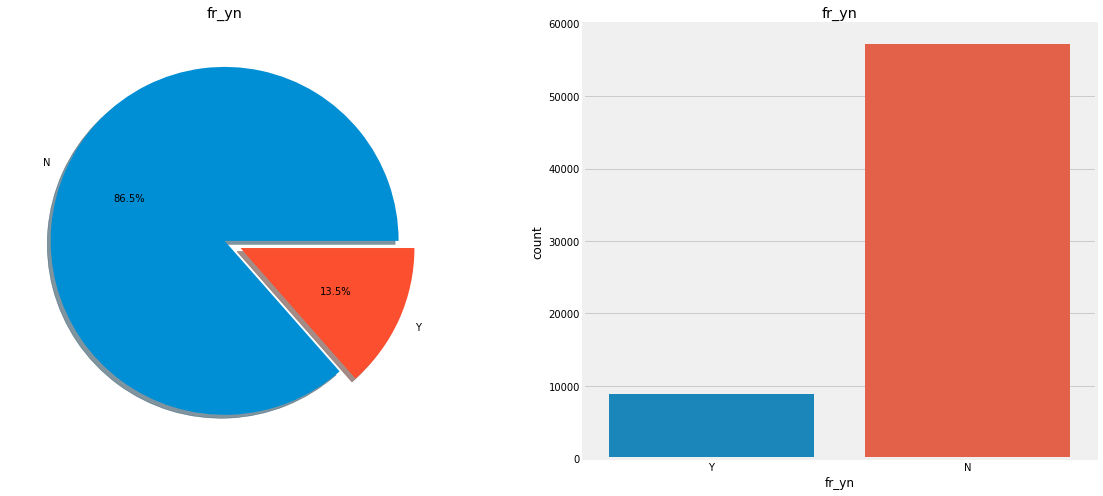

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['fr_yn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('fr_yn')
ax[0].set_ylabel('')
sns.countplot('fr_yn',data=data,ax=ax[1])
ax[1].set_title('fr_yn')
plt.show()

In [41]:
data['dt_of_fr'] = pd.to_datetime(data['dt_of_fr'])

In [42]:
type(data['dt_of_fr'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

## 행정구역명


In [54]:
data['emd_nm'].nunique()

371

동/면 까지로 split하기

In [60]:
pd.crosstab(data.emd_nm,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
emd_nm,,,
경상남도 거제시 거제면,262,46,308
경상남도 거제시 거제면 법동리,1,0,1
경상남도 거제시 거제면 오수리,1,0,1
경상남도 거제시 고현동,190,133,323
경상남도 거제시 남부면,101,13,114
경상남도 거제시 능포동,83,25,108
경상남도 거제시 동부면,229,31,260
경상남도 거제시 둔덕면,175,11,186
경상남도 거제시 둔덕면 학산리,0,1,1


## 건물구조

In [57]:
data['bldng_archtctr'].nunique()


18

In [59]:
pd.crosstab(data.bldng_archtctr,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
bldng_archtctr,,,
강파이프구조,312,104,416
경량철골구조,2810,1093,3903
기타강구조,28,12,40
기타구조,24,8,32
기타조적구조,337,76,413
기타콘크리트구조,2,2,4
목구조,16,3,19
벽돌구조,6806,1182,7988
블록구조,3851,827,4678


## 건물용도

In [61]:
data['bldng_us'].nunique()

34

In [62]:
pd.crosstab(data.bldng_us,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
bldng_us,,,
공공용시설,1,0,1
공동주택,580,782,1362
공장,1186,956,2142
관광휴게시설,10,24,34
교육연구및복지시설,12,6,18
교육연구시설,110,107,217
교정및군사시설,6,3,9
근린생활시설,25,8,33
노유자시설,176,57,233


## 건물용도분류명

In [64]:
data['bldng_us_clssfctn'].nunique()

7

In [65]:
pd.crosstab(data.bldng_us_clssfctn,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
bldng_us_clssfctn,,,
공공용,22,20,42
공업용,1053,863,1916
기타,1561,473,2034
농수산용,1045,340,1385
문교사회용,484,314,798
상업용,4295,2165,6460
주거용,18318,4189,22507
All,26778,8364,35142


## 소방시설특례5호여부


In [70]:
data['fr_fghtng_fclt_spcl_css_6_yn'].nunique()

1

In [71]:
pd.crosstab(data.fr_fghtng_fclt_spcl_css_6_yn,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
fr_fghtng_fclt_spcl_css_6_yn,,,
N,7771,1863,9634
All,7771,1863,9634


## 지적상 지목

In [72]:
data['jmk'].nunique()

26

In [73]:
pd.crosstab(data.jmk,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
jmk,,,
공,30,8,38
과,165,3,168
구,242,2,244
답,2258,160,2418
대,43757,6643,50400
도,626,23,649
목,881,153,1034
묘,57,2,59
사,10,3,13


## 토지이용상황명


In [74]:
data['lnd_us_sttn_nm'].nunique()

45

In [75]:
pd.crosstab(data.lnd_us_sttn_nm,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
lnd_us_sttn_nm,,,
경마장,1,0,1
고속도로휴게소,4,14,18
골프장 대중제,8,2,10
골프장 회원제,10,2,12
공업기타,176,53,229
공업나지,98,41,139
공업용,2276,1033,3309
공원등,49,9,58
공원묘지,3,1,4


## 도로측면명


In [76]:
data['rd_sd_nm'].nunique()

13

In [77]:
pd.crosstab(data.rd_sd_nm,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
rd_sd_nm,,,
광대로한면,605,193,798
광대세각,70,30,100
광대소각,347,260,607
맹지,2219,126,2345
세로각지(가),2031,251,2282
세로각지(불),656,64,720
세로한면(가),20781,2940,23721
세로한면(불),15033,1367,16400
소로각지,2128,603,2731


## 용도지역지구명

In [78]:
data['rgnl_ar_nm'].nunique()

23

In [79]:
pd.crosstab(data.rgnl_ar_nm,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
rgnl_ar_nm,,,
개발제한구역,343,34,377
계획관리지역,24028,3086,27114
관리지역,4,0,4
근린상업지역,49,18,67
농림지역,1851,285,2136
보전관리지역,1833,206,2039
보전녹지지역,137,20,157
생산관리지역,1929,242,2171
생산녹지지역,345,97,442


## 용도지역지구명2


In [80]:
data['rgnl_ar_nm2'].nunique()

19

In [81]:
pd.crosstab(data.rgnl_ar_nm2,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
rgnl_ar_nm2,,,
개발제한구역,13,0,13
계획관리지역,97,9,106
관리지역,5,1,6
근린상업지역,5,0,5
농림지역,74,10,84
보전관리지역,91,14,105
보전녹지지역,33,4,37
생산관리지역,49,11,60
생산녹지지역,22,1,23


## 소방관리대상물기준


In [82]:
data['trgt_crtr'].nunique()

17

In [83]:
pd.crosstab(data.trgt_crtr,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
trgt_crtr,,,
11층이상,1,1,2
견본주택(모델하우스),1,0,1
공동주택(주택법시행령제63조제1항각호1에해당),1,5,6
기타,0,1,1
기타(가설건축물분류),2,0,2
민박7실이상,16,1,17
민박7실이하,242,56,298
"스프링클러,물분무등설치대상",24,22,46
"연면적 15,000 이상",4,2,6


## 사용여부

In [84]:
data['us_yn'].nunique()

3

In [85]:
pd.crosstab(data.us_yn,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
us_yn,,,
N,1200,350,1550
T,363,295,658
Y,7404,1527,8931
All,8967,2172,11139


In [86]:
pd.crosstab(data.lw_13101010,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
lw_13101010,,,
1.5,0,1,1
2.0,3,11,14
2.15384615384615,1,0,1
2.40909090909091,1,0,1
2.4583333333333304,1,0,1
2.5,3,5,8
2.52,0,3,3
2.5652173913043503,0,1,1
2.59090909090909,1,0,1


In [87]:
pd.crosstab(data.lw_13101110,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
lw_13101110,,,
0.0,15,25,40
1.33333333333333,0,2,2
1.3448275862069,0,3,3
1.3684210526315799,1,0,1
1.5,2,0,2
1.59090909090909,1,0,1
1.61904761904762,1,0,1
1.6363636363636398,0,1,1
1.8,1,0,1


In [88]:
pd.crosstab(data.lw_13101210,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
lw_13101210,,,
0.0,3,4,7
1.2,0,1,1
2.0,3,9,12
2.03921568627451,1,0,1
2.15384615384615,1,0,1
2.1666666666666696,0,2,2
2.40909090909091,1,0,1
2.4583333333333304,1,0,1
2.5,3,0,3


In [89]:
pd.crosstab(data.lw_13101211,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
lw_13101211,,,
0.0,4,17,21
1.5,0,1,1
1.8,1,0,1
2.0,1,7,8
2.05263157894737,2,0,2
2.15384615384615,1,1,2
2.3636363636363598,1,0,1
2.4,1,2,3
2.40909090909091,1,0,1


In [90]:
pd.crosstab(data.lw_13101310,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
lw_13101310,,,
0.0,12,26,38
1.875,0,1,1
2.0,1,1,2
2.03921568627451,1,0,1
2.05263157894737,1,3,4
2.15384615384615,1,0,1
2.4,4,1,5
2.5,0,6,6
2.58823529411765,3,0,3


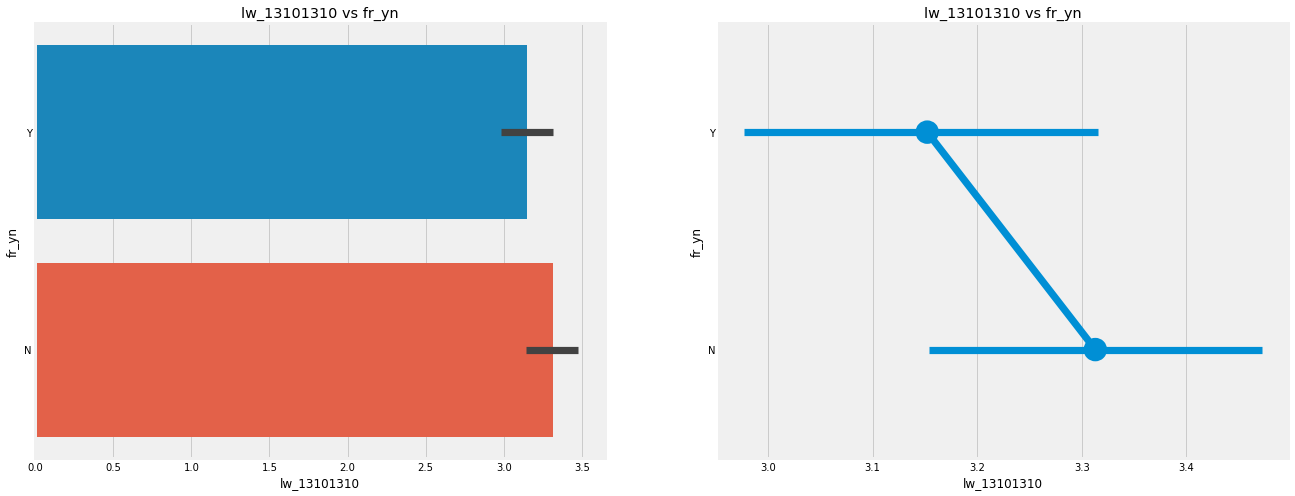

In [92]:

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('lw_13101310','fr_yn',data=data,ax=ax[0])
ax[0].set_title('lw_13101310 vs fr_yn')
sns.factorplot('lw_13101310','fr_yn',data=data,ax=ax[1])
ax[1].set_title('lw_13101310 vs fr_yn')
plt.close(2)
plt.show()

In [95]:
data['lw_13101310'].nunique()


40

In [116]:
import datetime as dt

In [117]:
data['DT_hour'] = (data['dt_of_fr'].dt.hour).astype(np.int8)
data['DT_day_week'] = (data['dt_of_fr'].dt.dayofweek).astype(np.int8)
data['DT_day_month'] = (data['dt_of_fr'].dt.day).astype(np.int8)
data['DT_M'] = (data['dt_of_fr'].dt.month).astype(np.int8)

In [120]:
data.head()

,ahsm_dstnc,bldng_ar,bldng_ar_prc,bldng_archtctr,bldng_cnt,bldng_cnt_in_50m,bldng_us,bldng_us_clssfctn,blk_dngrs_thng_mnfctr_yn,cctv_dstnc,...,ttl_ar,ttl_dwn_flr,ttl_grnd_flr,us_yn,wnd_drctn,wnd_spd,DT_hour,DT_day_week,DT_day_month,DT_M
0,11322,69.42,NaN,블록구조,3,0,단독주택,주거용,NaN,112,...,69.42,0.0,1.0,NaN,200.0,0.9,5,4,20,10
1,3369,46.29,122581.0,NaN,3,0,NaN,NaN,NaN,818,...,46.29,0.0,1.0,NaN,20.0,0.5,8,6,30,9
2,12451,583.80,618105.0,철근콘크리트구조,1,14,공동주택,주거용,NaN,165,...,2516.76,0.0,5.0,NaN,90.0,2.0,14,6,30,10
3,407,48.92,719542.0,일반목구조,2,11,단독주택,주거용,NaN,131,...,48.92,0.0,1.0,NaN,0.0,0.4,5,1,14,6
4,12487,0.00,NaN,NaN,2,0,NaN,NaN,NaN,686,...,0.00,NaN,NaN,NaN,360.0,0.6,5,6,22,4


In [121]:
pd.crosstab(data.DT_M,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
DT_M,,,
1,4732,923,5655
2,4789,859,5648
3,4791,881,5672
4,4900,683,5583
5,4686,808,5494
6,4737,629,5366
7,4785,540,5325
8,4769,648,5417
9,4672,569,5241


In [122]:
pd.crosstab(data.DT_hour,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
DT_hour,,,
0,2463,225,2688
1,2291,209,2500
2,2390,182,2572
3,2385,171,2556
4,2349,155,2504
5,2411,152,2563
6,2383,234,2617
7,2370,230,2600
8,2362,337,2699


In [123]:
pd.crosstab(data.DT_day_week,data.fr_yn,margins=True).style.background_gradient(cmap='summer_r')

fr_yn,N,Y,All
DT_day_week,,,
0,8321,1334,9655
1,8151,1216,9367
2,8274,1224,9498
3,7988,1285,9273
4,8092,1279,9371
5,8136,1315,9451
6,8206,1276,9482
All,57168,8929,66097
